In [1]:
from fastTSNE import TSNE, TSNEEmbedding
from fastTSNE.callbacks import ErrorLogger
from fastTSNE import initialization, affinity

from examples import utils

import numpy as np
import scipy.sparse as sp
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
import gzip
import pickle

with gzip.open("../data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y, cluster_ids = data["CellType1"], data["CellType2"]

In [3]:
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


In [4]:
def plot(x, y, **kwargs):
    utils.plot(x, y, colors=utils.MACOSKO_COLORS, **kwargs)

In [5]:
def rotate(degrees):
    phi = degrees * np.pi / 180
    return np.array([
        [np.cos(phi), -np.sin(phi)],
        [np.sin(phi), np.cos(phi)],
    ])

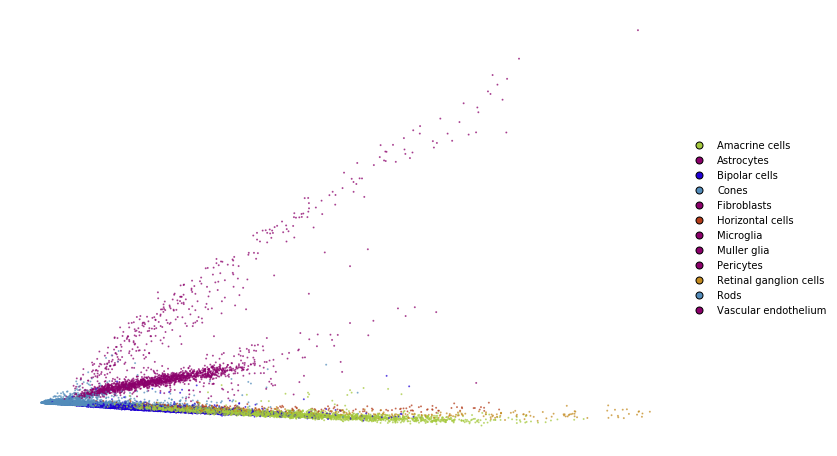

In [6]:
plot(x, y)

### Ordinary t-SNE

In [7]:
%time affinities = affinity.PerplexityBasedNN(x, perplexity=30, method="approx", n_jobs=8, random_state=3)

CPU times: user 45.1 s, sys: 1.07 s, total: 46.1 s
Wall time: 19.2 s


In [8]:
%%time
embedding = TSNEEmbedding(
    initialization.random(x, random_state=3),
    affinities,
    negative_gradient_method="fft",
    n_jobs=8,
    callbacks=ErrorLogger(),
    random_state=3,
)

embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, momentum=0.8, inplace=True)

Iteration   50, KL divergence  6.9036, 50 iterations in 1.3851 sec
Iteration  100, KL divergence  5.8490, 50 iterations in 1.3198 sec
Iteration  150, KL divergence  5.5915, 50 iterations in 1.2572 sec
Iteration  200, KL divergence  5.5157, 50 iterations in 1.2112 sec
Iteration  250, KL divergence  5.4786, 50 iterations in 1.3261 sec
Iteration   50, KL divergence  4.2043, 50 iterations in 1.3298 sec
Iteration  100, KL divergence  3.8198, 50 iterations in 1.2970 sec
Iteration  150, KL divergence  3.6040, 50 iterations in 1.6020 sec
Iteration  200, KL divergence  3.4581, 50 iterations in 1.7997 sec
Iteration  250, KL divergence  3.3493, 50 iterations in 1.8588 sec
Iteration  300, KL divergence  3.2640, 50 iterations in 2.1735 sec
Iteration  350, KL divergence  3.1951, 50 iterations in 2.6848 sec
Iteration  400, KL divergence  3.1381, 50 iterations in 2.7130 sec
Iteration  450, KL divergence  3.0902, 50 iterations in 3.4813 sec
Iteration  500, KL divergence  3.0495, 50 iterations in 3.9285

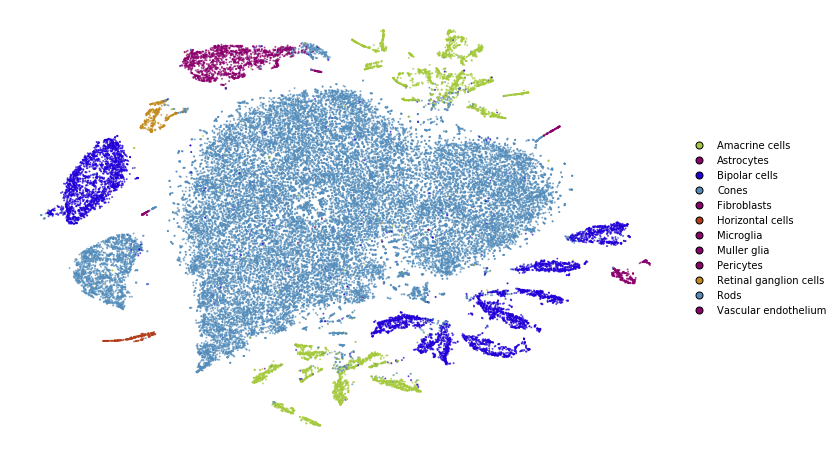

In [9]:
plot(embedding, y)

In [10]:
ordinary_embedding_30 = embedding.view(np.ndarray)

### Ordinary t-SNE with perplexity

In [26]:
%time affinities = affinity.PerplexityBasedNN(x, perplexity=500, method="approx", n_jobs=8, random_state=3)

CPU times: user 9min 37s, sys: 2.83 s, total: 9min 40s
Wall time: 2min 37s


In [27]:
%%time
embedding = TSNEEmbedding(
    initialization.random(x, random_state=3),
    affinities,
    negative_gradient_method="fft",
    n_jobs=8,
    callbacks=ErrorLogger(),
    random_state=3,
)

embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, momentum=0.8, inplace=True)

Iteration   50, KL divergence  4.1779, 50 iterations in 11.8040 sec
Iteration  100, KL divergence  3.6062, 50 iterations in 11.5760 sec
Iteration  150, KL divergence  3.4733, 50 iterations in 11.7695 sec
Iteration  200, KL divergence  3.4647, 50 iterations in 11.6923 sec
Iteration  250, KL divergence  3.4617, 50 iterations in 11.3204 sec
Iteration   50, KL divergence  1.9846, 50 iterations in 10.8130 sec
Iteration  100, KL divergence  1.7605, 50 iterations in 10.9834 sec
Iteration  150, KL divergence  1.6577, 50 iterations in 11.0325 sec
Iteration  200, KL divergence  1.5981, 50 iterations in 11.0094 sec
Iteration  250, KL divergence  1.5577, 50 iterations in 11.0977 sec
Iteration  300, KL divergence  1.5311, 50 iterations in 11.4843 sec
Iteration  350, KL divergence  1.5118, 50 iterations in 11.3833 sec
Iteration  400, KL divergence  1.4967, 50 iterations in 11.3776 sec
Iteration  450, KL divergence  1.4864, 50 iterations in 11.3002 sec
Iteration  500, KL divergence  1.4778, 50 iterat

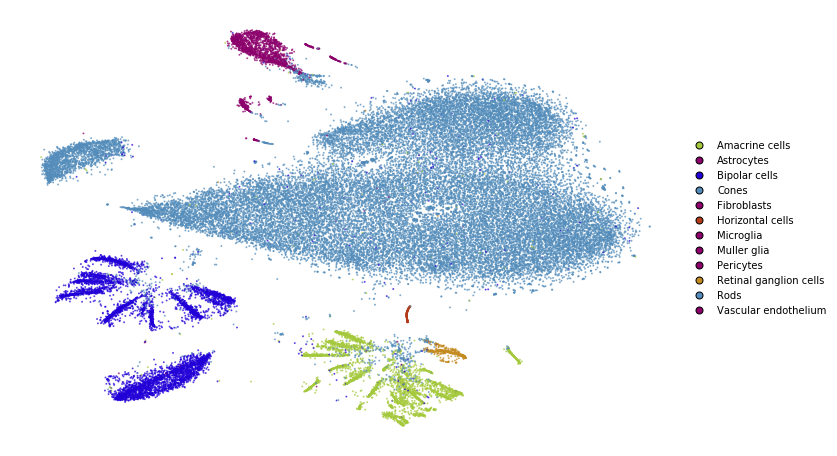

In [28]:
plot(embedding, y)

In [29]:
ordinary_embedding_500 = embedding.view(np.ndarray)

### Multiscale

In [11]:
%%time
affinities = affinity.Multiscale(
    x,
    perplexities=[50, 500],
    metric="cosine",
    method="approx",
    n_jobs=8,
    random_state=3,
)

CPU times: user 11min 42s, sys: 4.93 s, total: 11min 47s
Wall time: 2min 54s


In [12]:
%time init = initialization.pca(x, random_state=42)

CPU times: user 600 ms, sys: 44 ms, total: 644 ms
Wall time: 107 ms


In [13]:
embedding = TSNEEmbedding(
    init,
    affinities,
    negative_gradient_method="fft",
    n_jobs=8,
    callbacks=ErrorLogger(),
)

In [14]:
%time embedding1 = embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5)

Iteration   50, KL divergence  4.5452, 50 iterations in 10.2746 sec
Iteration  100, KL divergence  3.9698, 50 iterations in 9.9823 sec
Iteration  150, KL divergence  3.8935, 50 iterations in 10.0227 sec
Iteration  200, KL divergence  3.8668, 50 iterations in 10.1570 sec
Iteration  250, KL divergence  3.8539, 50 iterations in 10.0722 sec
CPU times: user 6min 48s, sys: 1.3 s, total: 6min 49s
Wall time: 51.3 s


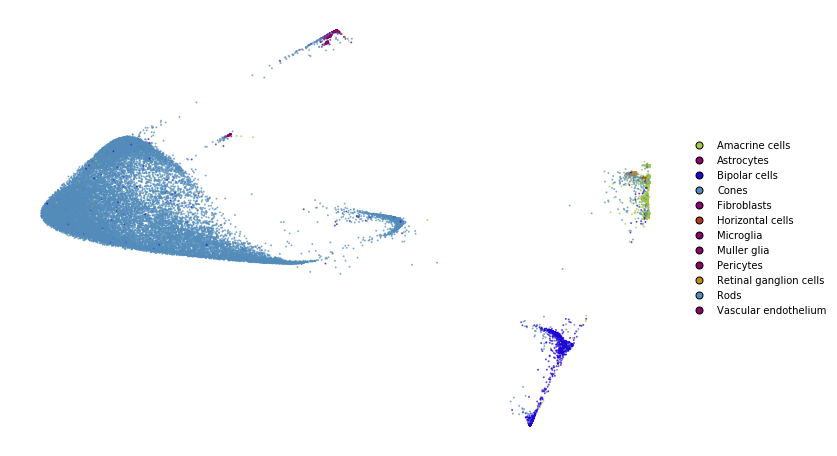

In [15]:
plot(embedding1, y)

In [16]:
%time embedding2 = embedding1.optimize(n_iter=750, momentum=0.8)

Iteration   50, KL divergence  2.6060, 50 iterations in 10.6123 sec
Iteration  100, KL divergence  2.3310, 50 iterations in 10.2218 sec
Iteration  150, KL divergence  2.1887, 50 iterations in 10.2509 sec
Iteration  200, KL divergence  2.0996, 50 iterations in 10.3998 sec
Iteration  250, KL divergence  2.0389, 50 iterations in 10.7465 sec
Iteration  300, KL divergence  1.9949, 50 iterations in 10.9329 sec
Iteration  350, KL divergence  1.9623, 50 iterations in 11.1586 sec
Iteration  400, KL divergence  1.9367, 50 iterations in 11.1701 sec
Iteration  450, KL divergence  1.9164, 50 iterations in 11.4773 sec
Iteration  500, KL divergence  1.9004, 50 iterations in 11.8365 sec
Iteration  550, KL divergence  1.8880, 50 iterations in 11.1961 sec
Iteration  600, KL divergence  1.8767, 50 iterations in 12.2128 sec
Iteration  650, KL divergence  1.8678, 50 iterations in 13.9087 sec
Iteration  700, KL divergence  1.8605, 50 iterations in 14.3079 sec
Iteration  750, KL divergence  1.8539, 50 iterat

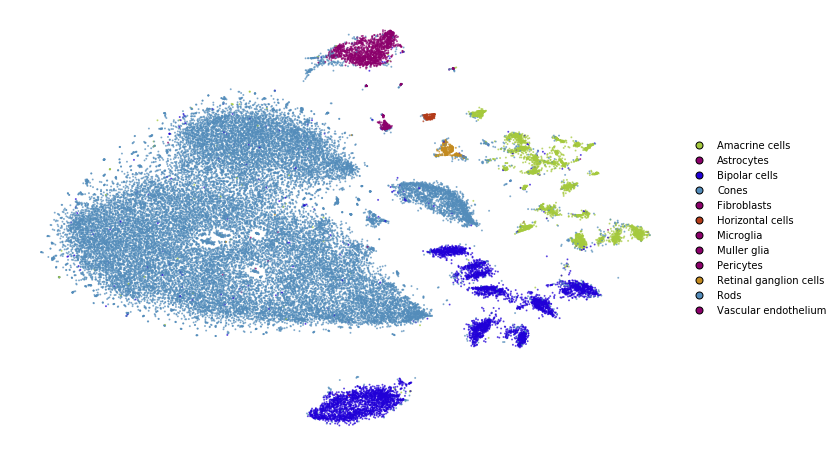

In [17]:
plot(embedding2, y)

In [18]:
multiscale_embedding = embedding2.view(np.ndarray)

## Paper figure

In [19]:
cluster_ids = np.array(data["CellType2"], dtype=float).astype(int)
np.unique(cluster_ids)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [20]:
cluster_cell_mapping = {
    1: "Horizontal cells",
    2: "Retinal ganglion cells",
    24: "Rods",
    25: "Cones",
    34: "Muller glia",
    35: "Astrocytes",
    36: "Fibroblasts",
    37: "Vascular endothelium",
    38: "Pericytes",
    39: "Microglia",
}
for i in range(3, 24):
    cluster_cell_mapping[i] = "Amacrine cells"
for i in range(26, 34):
    cluster_cell_mapping[i] = "Bipolar cells"

In [21]:
cluster_ids_ = [cluster_cell_mapping[yi] if yi in (1, 2, 24, 25, 34, 35, 36, 37, 38, 39) else yi 
                for yi in cluster_ids]
cluster_ids_ = np.array(cluster_ids_)
np.unique(cluster_ids_)

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '4', '5', '6', '7', '8', '9', 'Astrocytes', 'Cones',
       'Fibroblasts', 'Horizontal cells', 'Microglia', 'Muller glia',
       'Pericytes', 'Retinal ganglion cells', 'Rods',
       'Vascular endothelium'], dtype='<U22')

In [22]:
colors = {}
for label in np.unique(cluster_ids_):
    try:
        assert int(label) in cluster_cell_mapping
        colors[label] = utils.MACOSKO_COLORS[cluster_cell_mapping[int(label)]]
    except ValueError:
        colors[label] = utils.MACOSKO_COLORS[label]
        
np.array(list(colors.keys()))

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '4', '5', '6', '7', '8', '9', 'Astrocytes', 'Cones',
       'Fibroblasts', 'Horizontal cells', 'Microglia', 'Muller glia',
       'Pericytes', 'Retinal ganglion cells', 'Rods',
       'Vascular endothelium'], dtype='<U22')

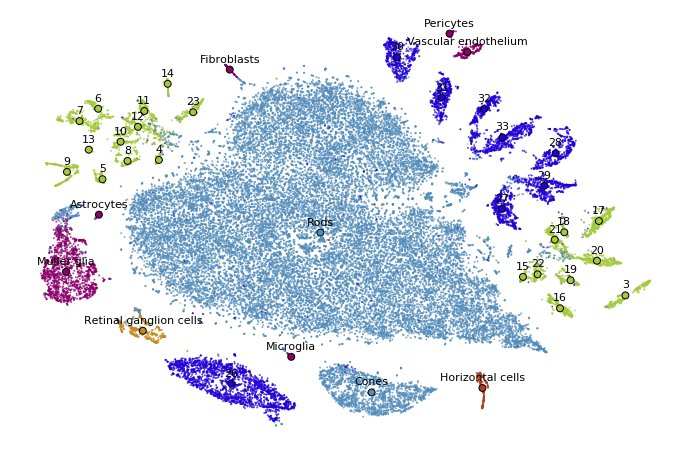

In [23]:
utils.plot(ordinary_embedding_30 @ rotate(-80), cluster_ids_, colors=colors, fontsize=11,
           draw_centers=True, draw_cluster_labels=True, draw_legend=False)

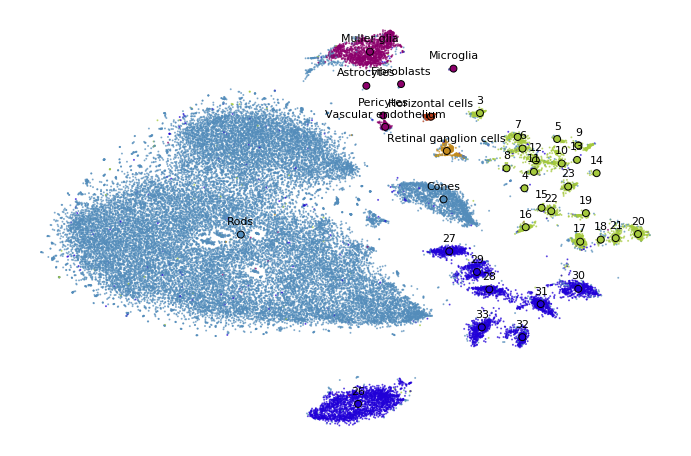

In [24]:
utils.plot(multiscale_embedding, cluster_ids_, colors=colors, fontsize=11,
           draw_centers=True, draw_cluster_labels=True, draw_legend=False)

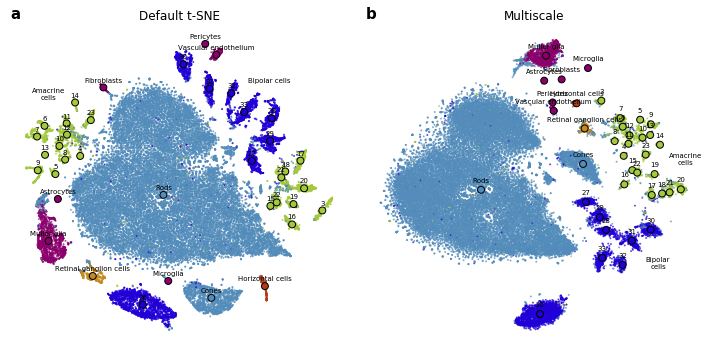

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
utils.plot(ordinary_embedding_30 @ rotate(-90), cluster_ids_, colors=colors, ax=ax[0], fontsize=7,
           title="Default t-SNE", draw_centers=True, draw_cluster_labels=True, draw_legend=False)
plt.text(-52, 40, "Amacrine\ncells", color="k", fontsize=7, horizontalalignment="center", transform=ax[0].transData)
plt.text(43, 47, "Bipolar cells", color="k", fontsize=7, horizontalalignment="center", transform=ax[0].transData)


utils.plot(multiscale_embedding, cluster_ids_, colors=colors, ax=ax[1], fontsize=7,
           title="Multiscale", draw_centers=True, draw_cluster_labels=True, draw_legend=False)
plt.text(48, 6, "Amacrine\ncells", color="k", fontsize=7, horizontalalignment="center", transform=ax[1].transData)
plt.text(40, -26, "Bipolar\ncells", color="k", fontsize=7, horizontalalignment="center", transform=ax[1].transData)

plt.tight_layout()
plt.text(0, 1.02, "a", transform=ax[0].transAxes, fontsize=15, fontweight="bold")
plt.text(0, 1.02, "b", transform=ax[1].transAxes, fontsize=15, fontweight="bold")

plt.savefig("macosko.pdf", dpi=600, transparent=True)

## Header image

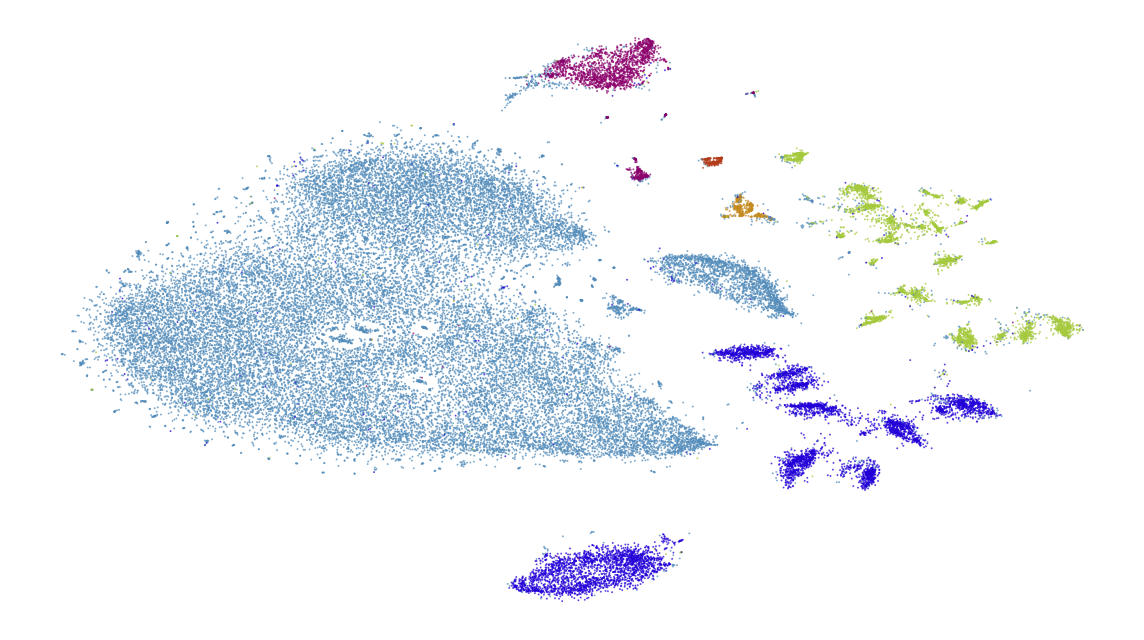

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
utils.plot(
    multiscale_embedding,
    cluster_ids_,
    colors=colors,
    fontsize=11,
    # draw_centers=True,
    # draw_cluster_labels=True,
    draw_legend=False,
    ax=ax,
)

plt.tight_layout()
plt.savefig("macosko_header.png", dpi=100, transparent=True)

## Exaggeration comparison

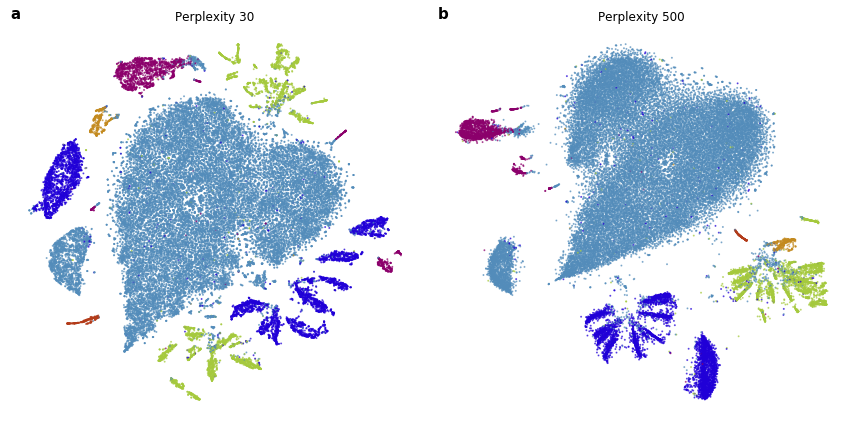

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plot(ordinary_embedding_30, y, title="Perplexity 30", ax=ax[0], draw_legend=False)
plot(ordinary_embedding_500 @ rotate(-50), y, title="Perplexity 500", ax=ax[1], draw_legend=False)

plt.tight_layout()
plt.text(0, 1.02, "a", transform=ax[0].transAxes, fontsize=15, fontweight="bold")
plt.text(0, 1.02, "b", transform=ax[1].transAxes, fontsize=15, fontweight="bold")

plt.savefig("macosko_perplexity.png", dpi=100, transparent=True)
plt.savefig("macosko_perplexity.pdf", dpi=600, transparent=True)